In [2]:
using CSV, DataFrames, Plots, Dates, StatsPlots, EvalMetrics, NamedArrays, DataTables

In [6]:
#Importation du script de fonctions utiles
using NBInclude
@nbinclude("Functions.ipynb")

PCA_principal_components (generic function with 1 method)

# Données de précipitation

## Données du pluviomètre de l'aéroport

In [21]:
#Données de précipitation de l'aéroport international Pierre-Elliott-Trudeau
rain_aero = CSV.read(raw"Données/Aeroport/Data_Airport_PETrudeau.csv", DataFrame)

rain_aero.Rainfall .= rain_aero.Rainfall .* 10
println(describe(rain_aero))

rain_aero_daily = preTreatRainData(rain_aero,[:d1h, :d2h, :d3h, :d4h, :d6h, :d8h, :d12h, :d18h, :d24h] ,
                                           [1, 2, 3, 4, 6, 8, 12, 18, 24])
describe(rain_aero_daily)

3×7 DataFrame
 Row │ variable  mean     min                  median               max                  nmissing  eltype   
     │ Symbol    Union…   Any                  Any                  Any                  Int64     DataType 
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Date               2013-12-10T16:00:00  2018-07-01T19:30:00  2022-12-31T23:00:00         0  DateTime
   2 │ Rainfall  1.10133  0.0                  0.0                  366.0                       0  Float64
   3 │ Validity                                                                             78730  Missing


,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Date,,2013-12-10,,2022-12-31,0,Date
2,d1h,9.70006,0.0,0.0,366.0,0,Float64
3,d2h,14.2155,0.0,2.0,366.0,0,Float64
4,d3h,17.2726,0.0,2.0,500.0,0,Float64
5,d4h,19.9587,0.0,2.0,564.0,0,Float64
6,d6h,24.2471,0.0,2.0,621.0,0,Float64
7,d8h,28.0732,0.0,2.0,675.0,0,Float64
8,d12h,34.5619,0.0,3.0,710.0,0,Float64
9,d18h,42.4353,0.0,5.0,712.0,0,Float64


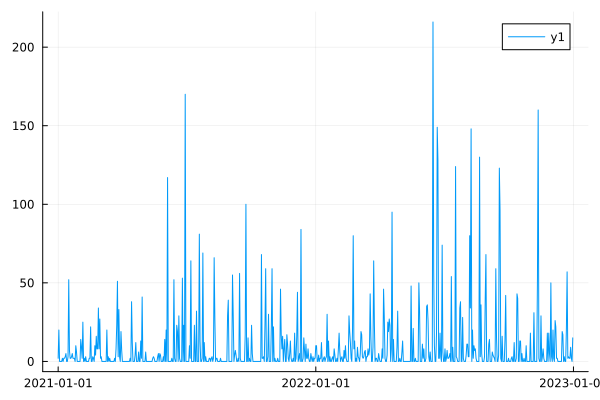

In [4]:
rain_aero_20212022 = rain_aero_daily[Dates.year.(rain_aero_daily.Date) .>=2021 ,:]
plot(rain_aero_20212022.Date, rain_aero_20212022.d1h)

## Données du pluviomètre de l'aéroport aux 15 minutes 

In [5]:
#Données de précipitation aux 15 minutes de l'aéroport international Pierre-Elliott-Trudeau
rain_aero_15_daily = CSV.read("Données/Data_Airport_PETrudeau_15mins.csv", DataFrame)

println(describe(rain_aero_15_daily))

12×7 DataFrame
 Row │ variable  mean     min         median      max         nmissing  eltype   
     │ Symbol    Union…   Any         Any         Any         Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────
   1 │ Date               2008-05-01  2015-05-24  2021-10-31         0  Date
   2 │ d15min    7.5855   0.0         0.0         243.0              0  Float64
   3 │ d30min    11.0062  0.0         0.0         335.0              0  Float64
   4 │ d45min    13.0758  0.0         0.0         367.0              0  Float64
   5 │ d1h       14.6283  0.0         0.0         367.0              0  Float64
   6 │ d2h       18.8307  0.0         0.0         367.0              0  Float64
   7 │ d3h       22.0688  0.0         0.0         501.0              0  Float64
   8 │ d4h       24.8356  0.0         0.0         565.0              0  Float64
   9 │ d6h       29.3304  0.0         2.0         620.0              0  Float64
  10 │ d8h       33.48

## Données du pluviomètre de la ville de Montréal le plus proche des ouvrages 

In [6]:
#Données de précipitation du pluviomètre le plus proche : 1431

rain_1431 = getRainData(1431)
rain_1431_daily = preTreatRainData(rain_1431)
describe(rain_1431_daily)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Date,,2008-07-09,2016-09-22,2022-01-01,0,Date
2,d5min,3.90597,0.0,0.0,167.5,0,Float64
3,d10min,5.92283,0.0,0.0,315.0,0,Float64
4,d15min,7.31518,0.0,0.0,425.0,0,Float64
5,d20min,8.52075,0.0,0.0,475.0,0,Float64
6,d25min,9.48314,0.0,0.0,502.5,0,Float64
7,d30min,10.3132,0.0,0.0,522.5,0,Float64
8,d35min,11.1543,0.0,0.0,532.5,0,Float64
9,d40min,11.9416,0.0,0.0,542.5,0,Float64


## Données de précipitation observée et prédite par pixel

In [8]:
# Données par pixels observée

rain_pixel_T0 = CSV.read(raw"C:\Users\takum\Downloads\Recherche\TakumiTherville\Radar txt\Fichiers_per_prediction time\radar_T0.csv", DataFrame)
rain_pixel_T0[!,:common_date] = rain_pixel_T0.Date

# Données de prédiction 115 minutes à l'avance

rain_pixel_T110 = CSV.read(raw"C:\Users\takum\Downloads\Recherche\TakumiTherville\Radar txt\Fichiers_per_prediction time\radar_T110.csv", DataFrame)

rename!(rain_pixel_T110, vcat("pred_" .*names(rain_pixel_T110)[1:end-1], "common_date"))

rain_pixel_compare = innerjoin(rain_pixel_T0, rain_pixel_T110, on = :common_date)
rain_pixel_T110 = 0
describe(rain_pixel_compare)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,6009,0.103408,0.0,0.0,133.2,0,Float64
2,6010,0.100042,0.0,0.0,86.5,0,Float64
3,6011,0.101837,0.0,0.0,153.8,0,Float64
4,7009,0.100178,0.0,0.0,133.2,0,Float64
5,7010,0.0985277,0.0,0.0,64.8,0,Float64
6,7011,0.0988152,0.0,0.0,86.5,0,Float64
7,8009,0.100172,0.0,0.0,115.3,0,Float64
8,8010,0.0984605,0.0,0.0,99.9,0,Float64
9,8011,0.0952899,0.0,0.0,74.9,0,Float64


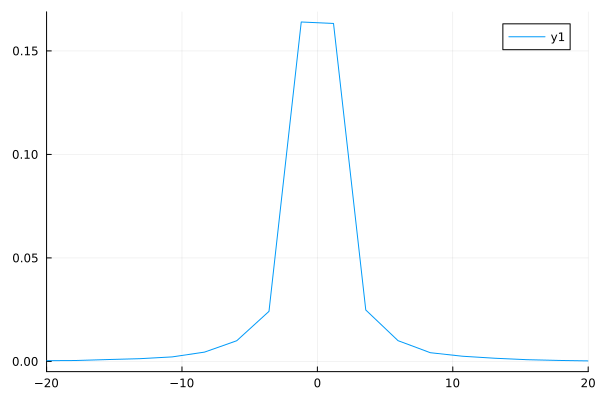

In [9]:
rain_pixel_compare[!,:same_42018] .= (rain_pixel_compare.pred_42018 .== rain_pixel_compare[:, "42018"])
rain_pixel_compare[!,:diff_42018] .= (rain_pixel_compare.pred_42018 .- rain_pixel_compare[:, "42018"])

gd = groupby(select(rain_pixel_compare, [:common_date, Symbol("42018"), :pred_42018, :diff_42018, :same_42018]), :same_42018)

@df gd[1] density(:diff_42018, xlim = (-20,20))

# Données de surverse

## Données journalières de surverse

In [15]:
#Données de surverse journalière aux ouvrages d'intérêt
sites = ["4380-01D", "4400-01D", "4795-01D", "4420-04D", "4420-01D", "4400-02D"]
cso_daily = getCSOData(sites)
describe(cso_daily)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,Type
1,Site,,4380-01D,,4795-01D,0,String15
2,Date,,2013-05-01,2017-09-29,2020-12-31,0,Date
3,Duration,4.60383,0.0,0.0,1436.0,1679,"Union{Missing, Float64}"
4,Code,,F,,U,13468,"Union{Missing, String3}"
5,Monitored,,NS,,NS,13740,"Union{Missing, String3}"
6,Comment,,Données incomplètes,,verifier,13751,"Union{Missing, String}"


# Données jointes de précipitation et surverse, preprocessing

## Données de l'aéroport jointe avec données journalières de surverse

In [11]:
data_aero_daily = outerjoin(rain_aero_daily, cso_daily, on = :Date) 
    
preTreatFullData!(data_aero_daily, "Duration", "d1h", "d24h", ["Monitored", "Comment"])
describe(data_aero_daily)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,Type
1,Date,,2014-05-01,2018-04-13,2020-12-31,0,Date
2,d1h,10.3269,0.0,0.0,366.0,0,Float64
3,d2h,15.0556,0.0,0.0,366.0,0,"Union{Missing, Float64}"
4,d3h,18.2984,0.0,2.0,500.0,0,"Union{Missing, Float64}"
5,d4h,21.1348,0.0,2.0,564.0,0,"Union{Missing, Float64}"
6,d6h,25.66,0.0,2.0,621.0,0,"Union{Missing, Float64}"
7,d8h,29.7293,0.0,2.0,675.0,0,"Union{Missing, Float64}"
8,d12h,36.8713,0.0,2.0,710.0,0,"Union{Missing, Float64}"
9,d18h,45.3361,0.0,5.0,712.0,0,"Union{Missing, Float64}"


In [12]:
#Proportion de surverses dues à la pluie durant la période mai-octobre

# Il y a un total de 11862 jours considérés

# Sur 472 surverses dues à la pluie sur l'année au complet, 381 sont dans la période mai-octobre
# Sur 389 surverses en mai-octobre, 381 sont dues à la pluie

println(size(data_aero_daily[(Dates.month.(data_aero_daily.Date) .>= 5) .& (Dates.month.(data_aero_daily.Date) .<= 10) .& (data_aero_daily.Duration .> 0) .& (data_aero_daily.Code .== "P"),:]))
println(size(data_aero_daily[(Dates.month.(data_aero_daily.Date) .>= 5) .& (Dates.month.(data_aero_daily.Date) .<= 10) .& (data_aero_daily.Duration .> 0) ,:]))

println(size(data_aero_daily[(data_aero_daily.Duration .> 0) .& (data_aero_daily.Code .== "P"),:]))

println(size(data_aero_daily))

(429, 14)
(439, 14)
(526, 14)
(11923, 14)


In [13]:
#Mise en commun des deux ensembles de donnée, sélection des surverses dues à la pluie et de la préiode mai-octobre
selectCause!(cso_daily, "Code", "P", true)
data_aero_daily = outerjoin(rain_aero_daily, cso_daily, on = :Date) 

preTreatFullData!(data_aero_daily, "Duration", "d1h", "d24h", ["Monitored", "Comment", "Code"])
data_aero_daily = data_aero_daily[(Dates.month.(data_aero_daily.Date) .>= 5) .& (Dates.month.(data_aero_daily.Date) .<= 10), :]
describe(data_aero_daily)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,Type
1,Date,,2014-05-01,2017-10-25,2020-10-31,0,Date
2,d1h,12.6643,0.0,0.0,366.0,0,Float64
3,d2h,17.5785,0.0,0.0,366.0,0,"Union{Missing, Float64}"
4,d3h,20.6704,0.0,0.0,500.0,0,"Union{Missing, Float64}"
5,d4h,23.3657,0.0,0.0,564.0,0,"Union{Missing, Float64}"
6,d6h,27.7627,0.0,0.0,621.0,0,"Union{Missing, Float64}"
7,d8h,31.685,0.0,0.0,675.0,0,"Union{Missing, Float64}"
8,d12h,39.1463,0.0,0.0,710.0,0,"Union{Missing, Float64}"
9,d18h,47.3994,0.0,2.0,712.0,0,"Union{Missing, Float64}"


In [14]:
# Profil des précipitations par site en fonction de surverse ou non

data_per_site = groupby(data_aero_daily, :Site)

for d in data_per_site
    d_cso = groupby(d, :CSO)
    for dd in d_cso
        println(dd.Site[1])
        println(describe(dd))
    end
end

4380-01D
13×7 DataFrame
 Row │ variable  mean     min         median      max         nmissing  eltype                   
     │ Symbol    Union…   Any         Any         Any         Int64     Type                     
─────┼───────────────────────────────────────────────────────────────────────────────────────────
   1 │ Date               2014-05-01  2017-08-22  2020-10-31         0  Date
   2 │ d1h       6.86246  0.0         0.0         216.0              0  Float64
   3 │ d2h       9.54931  0.0         0.0         224.0              0  Union{Missing, Float64}
   4 │ d3h       11.1851  0.0         0.0         230.0              0  Union{Missing, Float64}
   5 │ d4h       12.9109  0.0         0.0         230.0              0  Union{Missing, Float64}
   6 │ d6h       15.833   0.0         0.0         441.0              0  Union{Missing, Float64}
   7 │ d8h       18.8694  0.0         0.0         659.0              0  Union{Missing, Float64}
   8 │ d12h      24.5433  0.0         0.0    

  13 │ CSO       1.0      true        1.0         true               0  Bool
4420-01D
13×7 DataFrame
 Row │ variable  mean     min         median      max         nmissing  eltype                   
     │ Symbol    Union…   Any         Any         Any         Int64     Type                     
─────┼───────────────────────────────────────────────────────────────────────────────────────────
   1 │ Date               2014-05-01  2018-06-02  2020-10-31         0  Date
   2 │ d1h       9.45854  0.0         0.0         366.0              0  Float64
   3 │ d2h       12.9351  0.0         0.0         366.0              0  Union{Missing, Float64}
   4 │ d3h       14.953   0.0         0.0         366.0              0  Union{Missing, Float64}
   5 │ d4h       17.0989  0.0         0.0         366.0              0  Union{Missing, Float64}
   6 │ d6h       20.8891  0.0         0.0         441.0              0  Union{Missing, Float64}
   7 │ d8h       24.3586  0.0         0.0         659.0         

In [15]:
#Effacer les anomalies de surverse

println(data_aero_daily[ (data_aero_daily.CSO .== 1) .& (data_aero_daily.d24h .<= 5) ,:])
deleteCSOAnomalies!(data_aero_daily, "d24h", "CSO", 5.0, true)
describe(data_aero_daily)

10×13 DataFrame
 Row │ Date        d1h      d2h       d3h       d4h       d6h       d8h       d12h      d18h      d24h      Site       Duration  CSO  
     │ Date        Float64  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  String15?  Float64   Bool 
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 2015-05-07      0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0  4400-02D    85.0     true
   2 │ 2015-07-07      2.0       2.0       2.0       2.0       2.0       2.0       2.0       2.0       2.0  4380-01D    21.0     true
   3 │ 2015-07-07      2.0       2.0       2.0       2.0       2.0       2.0       2.0       2.0       2.0  4400-02D    60.0     true
   4 │ 2015-07-23      3.0       3.0       3.0       3.0       5.0       5.0       5.0       5.0       5.0  4400-02D    60.0     true
   5 │ 2015-08-24      0.0       0.0       

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,Type
1,Date,,2014-05-01,2017-10-25,2020-10-31,0,Date
2,d1h,12.6643,0.0,0.0,366.0,0,Float64
3,d2h,17.5785,0.0,0.0,366.0,0,"Union{Missing, Float64}"
4,d3h,20.6704,0.0,0.0,500.0,0,"Union{Missing, Float64}"
5,d4h,23.3657,0.0,0.0,564.0,0,"Union{Missing, Float64}"
6,d6h,27.7627,0.0,0.0,621.0,0,"Union{Missing, Float64}"
7,d8h,31.685,0.0,0.0,675.0,0,"Union{Missing, Float64}"
8,d12h,39.1463,0.0,0.0,710.0,0,"Union{Missing, Float64}"
9,d18h,47.3994,0.0,2.0,712.0,0,"Union{Missing, Float64}"


In [16]:
# Etat de surverse en fonction de différentes conditions de pluie
cso_site = data_aero_daily
no_rain_cso = size(cso_site[(cso_site.Duration .> 0) .& (cso_site.d24h .== 0),:])[1]
rain_cso = size(cso_site[(cso_site.Duration .> 0) .& (cso_site.d24h .> 0),:])[1]
no_rain_no_cso = size(cso_site[(cso_site.Duration .== 0) .& (cso_site.d24h .== 0),:])[1]
rain_no_cso = size(cso_site[(cso_site.Duration .== 0) .& (cso_site.d24h .> 0),:])[1]

n = NamedArray([rain_cso no_rain_cso; rain_no_cso no_rain_no_cso],
               (["yes", "no"], ["yes", "no"]), 
               ("cso", "rain"))
println("Total")
display(n)
println((rain_cso+no_rain_cso)/(rain_no_cso+no_rain_no_cso))

cso_per_site = groupby(data_aero_daily, :Site)
for cso_site in cso_per_site
    cso_site = DataFrame(cso_site)
    no_rain_cso = size(cso_site[(cso_site.Duration .> 0) .& (cso_site.d24h .== 0),:])[1]
    rain_cso = size(cso_site[(cso_site.Duration .> 0) .& (cso_site.d24h .> 0),:])[1]
    no_rain_no_cso = size(cso_site[(cso_site.Duration .== 0) .& (cso_site.d24h .== 0),:])[1]
    rain_no_cso = size(cso_site[(cso_site.Duration .== 0) .& (cso_site.d24h .> 0),:])[1]
    
    n = NamedArray([rain_cso no_rain_cso; rain_no_cso no_rain_no_cso],
               (["yes", "no"], ["yes", "no"]), 
               ("cso", "rain"))
    println(cso_site.Site[1])
    display(n)
    println((rain_cso+no_rain_cso)/(rain_no_cso+no_rain_no_cso))
end

Total


2×2 Named Matrix{Int64}
cso ╲ rain │  yes    no
───────────┼───────────
yes        │  424     5
no         │ 3550  2726

0.06835564053537285
4380-01D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │  99    1
no         │ 652  504

0.08650519031141868
4400-01D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │  52    0
no         │ 675  498

0.0443307757885763
4400-02D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │ 166    3
no         │ 588  495

0.15604801477377656
4420-01D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │  40    1
no         │ 577  424

0.04095904095904096
4420-04D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │  27    0
no         │ 532  391

0.02925243770314193
4795-01D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │  40    0
no         │ 526  414

0.0425531914893617


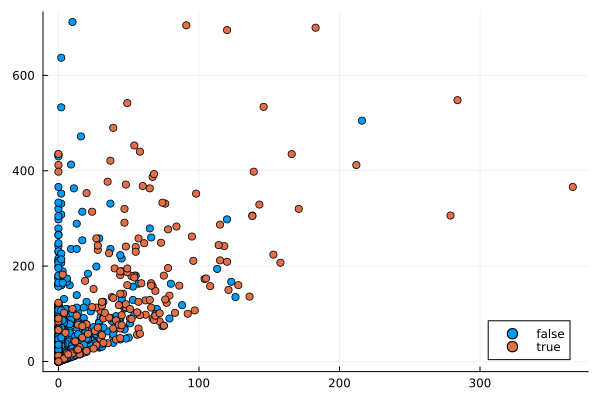

In [17]:
# Profil des précipitations menant à une surverse et celles n'y menant pas

cso_site = cso_per_site[3]

@df cso_site scatter(
    :d1h,
    :d24h,
    group = :CSO 
    #,xlim = (-0.5,10),
    #ylim = (-0.5,20)
)

In [18]:
deleteCSOAnomalies!(data_aero_daily, "d24h", "CSO", 5.0, true)
CSV.write("Données/data_aero_daily.csv", data_aero_daily)

"Données/data_aero_daily.csv"

## Données aux 15 minutes de l'aéroport jointes avec données journalières de surverse

In [19]:
data_aero_15_daily = outerjoin(rain_aero_15_daily, cso_daily, on = :Date) 
    
preTreatFullData!(data_aero_15_daily, "Duration", "d15min", "d24h", ["Monitored", "Comment"])
describe(data_aero_15_daily)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,Type
1,Date,,2013-05-01,2017-08-28,2020-10-31,0,Date
2,d15min,7.56435,0.0,0.0,243.0,0,Float64
3,d30min,11.1062,0.0,0.0,335.0,0,"Union{Missing, Float64}"
4,d45min,13.2523,0.0,0.0,367.0,0,"Union{Missing, Float64}"
5,d1h,14.8788,0.0,0.0,367.0,0,"Union{Missing, Float64}"
6,d2h,19.0379,0.0,0.0,367.0,0,"Union{Missing, Float64}"
7,d3h,22.2568,0.0,0.0,501.0,0,"Union{Missing, Float64}"
8,d4h,25.0535,0.0,0.0,565.0,0,"Union{Missing, Float64}"
9,d6h,29.1438,0.0,0.0,620.0,0,"Union{Missing, Float64}"


In [20]:
#Mise en commun des deux ensembles de donnée, sélection des surverses dues à la pluie et de la préiode mai-octobre
selectCause!(cso_daily, "Code", "P", true)
data_aero_15_daily = outerjoin(rain_aero_15_daily, cso_daily, on = :Date) 

preTreatFullData!(data_aero_15_daily, "Duration", "d1h", "d24h", ["Monitored", "Comment", "Code"])
data_aero_15_daily = data_aero_15_daily[(Dates.month.(data_aero_15_daily.Date) .>= 5) .& (Dates.month.(data_aero_15_daily.Date) .<= 10), :]
describe(data_aero_15_daily)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,Type
1,Date,,2013-05-01,2017-08-28,2020-10-31,0,Date
2,d15min,7.56435,0.0,0.0,243.0,0,"Union{Missing, Float64}"
3,d30min,11.1062,0.0,0.0,335.0,0,"Union{Missing, Float64}"
4,d45min,13.2523,0.0,0.0,367.0,0,"Union{Missing, Float64}"
5,d1h,14.8788,0.0,0.0,367.0,0,Float64
6,d2h,19.0379,0.0,0.0,367.0,0,"Union{Missing, Float64}"
7,d3h,22.2568,0.0,0.0,501.0,0,"Union{Missing, Float64}"
8,d4h,25.0535,0.0,0.0,565.0,0,"Union{Missing, Float64}"
9,d6h,29.1438,0.0,0.0,620.0,0,"Union{Missing, Float64}"


In [21]:
deleteCSOAnomalies!(data_aero_15_daily, "d24h", "CSO", 5.0, true)
CSV.write("Données/data_aero_15_daily.csv", data_aero_15_daily)

"Données/data_aero_15_daily.csv"

## Données du pluviomètre le plus proche jointe avec données journalières de surverse

In [22]:
data_1431_daily = outerjoin(rain_1431_daily, cso_daily, on = :Date) 
    
preTreatFullData!(data_1431_daily, "Duration", "d1h", "d24h", ["Monitored", "Comment"])
describe(data_1431_daily)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,Type
1,Date,,2013-05-01,2018-02-17,2020-12-31,0,Date
2,d5min,3.47149,0.0,0.0,127.5,0,"Union{Missing, Float64}"
3,d10min,5.33934,0.0,0.0,215.0,0,"Union{Missing, Float64}"
4,d15min,6.59411,0.0,0.0,232.5,0,"Union{Missing, Float64}"
5,d20min,7.52525,0.0,0.0,265.0,0,"Union{Missing, Float64}"
6,d25min,8.27211,0.0,0.0,287.5,0,"Union{Missing, Float64}"
7,d30min,8.90903,0.0,0.0,295.0,0,"Union{Missing, Float64}"
8,d35min,9.51674,0.0,0.0,307.5,0,"Union{Missing, Float64}"
9,d40min,10.0942,0.0,0.0,312.5,0,"Union{Missing, Float64}"


In [23]:
#Proportion de surverses dues à la pluie durant la période mai-octobre

# Il y a un total de 12576 jours considérés

# Sur 573 surverses dues à la pluie sur l'année au complet, 476 sont dans la période mai-octobre
# Sur 476 surverses en mai-octobre, 476 sont dues à la pluie

println(size(data_1431_daily[(Dates.month.(data_1431_daily.Date) .>= 5) .& (Dates.month.(data_1431_daily.Date) .<= 10) .& (data_1431_daily.Duration .> 0) .& (data_1431_daily.Code .== "P"),:]))
println(size(data_1431_daily[(Dates.month.(data_1431_daily.Date) .>= 5) .& (Dates.month.(data_1431_daily.Date) .<= 10) .& (data_1431_daily.Duration .> 0) ,:]))

println(size(data_1431_daily[(data_1431_daily.Duration .> 0) .& (data_1431_daily.Code .== "P"),:]))

println(size(data_1431_daily))

(476, 25)
(476, 25)
(573, 25)
(12576, 25)


In [24]:
preTreatFullData!(data_1431_daily, "Duration", "d1h", "d24h", ["Code"])
data_1431_daily = data_1431_daily[(Dates.month.(data_1431_daily.Date) .>= 5) .& (Dates.month.(data_1431_daily.Date) .<= 10), :]

println(data_1431_daily[ (data_1431_daily.CSO .== 1) .& (data_1431_daily.d24h .<= 5) ,:])
#deleteCSOAnomalies!(data_1431_daily, "d24h", "CSO", 5.0, true)
describe(data_1431_daily)

10×24 DataFrame
 Row │ Date        d5min     d10min    d15min    d20min    d25min    d30min    d35min    d40min    d45min    d50min    d55min    d1h      d2h       d3h       d4h       d6h       d8h       d12h      d18h      d24h      Site       Duration  CSO  
     │ Date        Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  Float64  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  String15?  Float64   Bool 
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 2013-09-18       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0      0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0  4400-02D       38.0  true
   2 

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,Type
1,Date,,2013-05-01,2017-08-30,2020-10-31,0,Date
2,d5min,4.76241,0.0,0.0,127.5,0,"Union{Missing, Float64}"
3,d10min,7.39832,0.0,0.0,215.0,0,"Union{Missing, Float64}"
4,d15min,9.08012,0.0,0.0,232.5,0,"Union{Missing, Float64}"
5,d20min,10.221,0.0,0.0,265.0,0,"Union{Missing, Float64}"
6,d25min,11.0975,0.0,0.0,287.5,0,"Union{Missing, Float64}"
7,d30min,11.8062,0.0,0.0,295.0,0,"Union{Missing, Float64}"
8,d35min,12.4973,0.0,0.0,307.5,0,"Union{Missing, Float64}"
9,d40min,13.1484,0.0,0.0,312.5,0,"Union{Missing, Float64}"


In [25]:
cso_site = data_1431_daily
no_rain_cso = size(cso_site[(cso_site.Duration .> 0) .& (cso_site.d24h .== 0),:])[1]
rain_cso = size(cso_site[(cso_site.Duration .> 0) .& (cso_site.d24h .> 0),:])[1]
no_rain_no_cso = size(cso_site[(cso_site.Duration .== 0) .& (cso_site.d24h .== 0),:])[1]
rain_no_cso = size(cso_site[(cso_site.Duration .== 0) .& (cso_site.d24h .> 0),:])[1]

n = NamedArray([rain_cso no_rain_cso; rain_no_cso no_rain_no_cso],
               (["yes", "no"], ["yes", "no"]), 
               ("cso", "rain"))
println("Total")
display(n)
println((rain_cso+no_rain_cso)/(rain_no_cso+no_rain_no_cso))

cso_per_site = groupby(data_1431_daily, :Site)
for cso_site in cso_per_site
    cso_site = DataFrame(cso_site)
    no_rain_cso = size(cso_site[(cso_site.Duration .> 0) .& (cso_site.d24h .== 0),:])[1]
    rain_cso = size(cso_site[(cso_site.Duration .> 0) .& (cso_site.d24h .> 0),:])[1]
    no_rain_no_cso = size(cso_site[(cso_site.Duration .== 0) .& (cso_site.d24h .== 0),:])[1]
    rain_no_cso = size(cso_site[(cso_site.Duration .== 0) .& (cso_site.d24h .> 0),:])[1]
    
    n = NamedArray([rain_cso no_rain_cso; rain_no_cso no_rain_no_cso],
               (["yes", "no"], ["yes", "no"]), 
               ("cso", "rain"))
    println(cso_site.Site[1])
    display(n)
    println((rain_cso+no_rain_cso)/(rain_no_cso+no_rain_no_cso))
end

Total


2×2 Named Matrix{Int64}
cso ╲ rain │  yes    no
───────────┼───────────
yes        │  470     6
no         │ 3861  3039

0.06898550724637681
4380-01D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │ 111    0
no         │ 725  573

0.08551617873651772
4400-01D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │  54    0
no         │ 727  536

0.04275534441805225
4400-02D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │ 187    3
no         │ 667  579

0.15248796147672553
4420-01D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │  39    3
no         │ 583  447

0.040776699029126215
4420-04D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │  34    0
no         │ 589  449

0.03275529865125241
4795-01D


2×2 Named Matrix{Int64}
cso ╲ rain │ yes   no
───────────┼─────────
yes        │  45    0
no         │ 570  455

0.04390243902439024


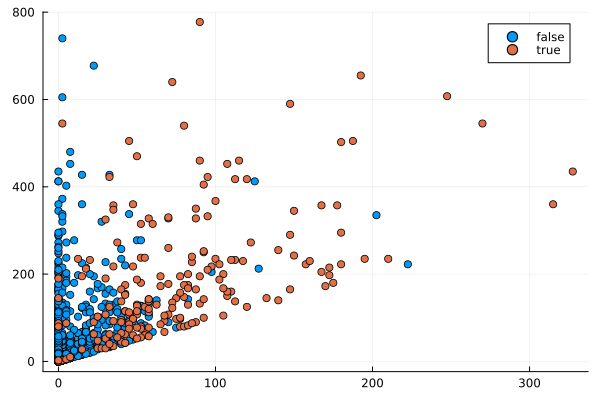

In [26]:
# Profil des précipitations menant à une surverse et celles n'y menant pas

cso_site = cso_per_site[3]

@df cso_site scatter(
    :d1h,
    :d24h,
    group = :CSO 
    #,xlim = (-0.5,10),
    #ylim = (-0.5,20)
)

In [35]:
deleteCSOAnomalies!(data_1431_daily, "d24h", "CSO", 5.0, true)
CSV.write("Données/data_1431_daily.csv", data_1431_daily)

"Données/data_1431_daily.csv"

# Importer les données de pluies de tous les pluvomètres et les joindre avec les données de surverses journalières

In [6]:
OBXLs = readdir("C:/Users/takum/Downloads/Recherche/TakumiTherville/Pluies/Hyétogramme_treated")
cso_daily_all = CSV.read("C:/Users/takum/Downloads/Recherche/AlexandrineLanson/Données/cso_raw.csv",DataFrame)

selectCause!(cso_daily_all, "Code", "P", true)

,Site,Date,Duration,Code,Monitored,Comment
,String15,Date,Float64?,String3?,String3?,String?
1,0642-01D,2013-05-01,missing,missing,missing,missing
2,0642-01D,2013-05-02,missing,missing,missing,missing
3,0642-01D,2013-05-03,missing,missing,missing,missing
4,0642-01D,2013-05-04,missing,missing,missing,missing
5,0642-01D,2013-05-05,missing,missing,missing,missing
6,0642-01D,2013-05-06,missing,missing,missing,missing
7,0642-01D,2013-05-07,missing,missing,missing,missing
8,0642-01D,2013-05-08,missing,missing,missing,missing
9,0642-01D,2013-05-09,missing,missing,missing,missing


In [11]:
rain_daily_all = DataFrame()
for filename in OBXLs
    
    OBXL_num = filename[5:8]
    println(OBXL_num)
    
    
    rain = CSV.read("C:/Users/takum/Downloads/Recherche/TakumiTherville/Pluies/Hyétogramme_treated/"*filename,DataFrame)
    rain_daily = preTreatRainData(rain)
    
    rain_daily[!, :OBXL] .= OBXL_num
    
    rain_daily_all = vcat(rain_daily_all, rain_daily)
    
end

CSV.write(raw"Données\data_all_OBXL_merged_treated.csv", rain_daily_all)

1011
1021
1031
1041
1051
1061
1071
1081
1091
1101
1111
1121
1131
1141
1151
1161
1211
1221
1231
1241
1251
1261
1271
1281
1281
1281
1291
1301
1311
1321
1331
1341
1351
1361
1401
1401
1401
1411
1431
1441
1461
1471
1481
1491
1501
1521
1531
1541
1551
1561
1571
1581
1591
1601
1611


"Données\\data_all_OBXL_merged_treated.csv"

In [10]:
rain_daily_all = CSV.read(raw"Données\data_all_OBXL_merged_treated.csv", DataFrame)
for this_site in groupby(cso_daily_all, :Site)
    
    site_name = this_site.Site[1]
    println(site_name)
    
    
    data_daily = outerjoin(rain_daily_all, this_site, on = :Date) 
    preTreatFullData!(data_daily, "Duration", "d1h", "d24h", ["Monitored", "Comment", "Code"])
    data_daily = data_daily[(Dates.month.(data_daily.Date) .>= 5) .& (Dates.month.(data_daily.Date) .<= 10), :]
    
    deleteCSOAnomalies!(data_daily, "d24h", "CSO", 5.0, true)
    CSV.write(raw"C:\Users\takum\Downloads\Recherche\TakumiTherville\AAA - Final(&) scripts\Données\data_all_sites_all_OBXL\data_"*site_name*"_daily_all_OBXL.csv", data_daily)
    
end

0642-01D
0672-01D
0672-02D
0672-03D
0801-01D
0801-02D
0801-03D
0801-04D
0801-05D
0801-06D
0801-07D
0801-08D
0801-09D
3230-01D
3240-02D
3240-04D
3240-05D
3250-01D
3250-02D
3260-01D
3270-01D
3275-01D
3275-02D
3280-01D
3280-02D
3290-01D
3305-01D
3305-02D
3305-03D
3305-04D
3310-01D
3320-01D
3330-01D
3340-01D
3350-01D
3350-02D
3350-03D
3350-05D
3350-06D
3350-07D
3350-08D
3350-09D
3350-10D
3350-11D
3370-01D
3380-01D
3390-01D
3400-01D
3410-01D
3410-02D
3411-01D
3450-01D
3450-02D
3460-01D
3480-01D
3480-02D
3480-03D
3480-04D
3480-05D
3490-01D
3490-02D
3500-01D
3500-02D
3500-03D
3530-01D
3540-01D
3540-02D
3560-01D
3580-01D
3750-01D
3762-01D
3765-01D
3767-01D
3768-01D
3780-01D
3781-01D
3782-01D
3790-02D
4210-01D
4230-01D
4230-02D
4230-03D
4230-04D
4230-05D
4230-06D
4230-07D
4230-08D
4230-09D
4230-10D
4240-01D
4240-02D
4250-01D
4260-01D
4265-01D
4270-01D
4270-02D
4280-01D
4280-02D
4290-01D
4300-01D
4310-01D
4315-01D
4317-01D
4320-01D
4330-01D
4330-02D
4340-01D
4340-02D
4340-03D
4350-01D
4360-01D
4

In [8]:
for filename in OBXLs
    
    OBXL_num = filename[5:8]
    
    println(OBXL_num)
    
    rain = CSV.read("C:/Users/takum/Downloads/Recherche/TakumiTherville/Pluies/Hyétogramme_treated/"*filename,DataFrame)
    rain_daily = preTreatRainData(rain)
    
    data_daily = outerjoin(rain_daily, cso_daily_all, on = :Date) 

    preTreatFullData!(data_daily, "Duration", "d1h", "d24h", ["Monitored", "Comment", "Code"])
    data_daily = data_daily[(Dates.month.(data_daily.Date) .>= 5) .& (Dates.month.(data_daily.Date) .<= 10), :]
    
    deleteCSOAnomalies!(data_daily, "d24h", "CSO", 5.0, true)
    CSV.write("Données/data_"*OBXL_num*"_daily.csv", data_daily)
end    

1011
1021
1031
1041
1051
1061
1071
1081
1091
1101
1111
1121
1131
1141
1151
1161
1211
1221
1231
1241
1251
1261
1271
1281
1281
1281
1291
1301
1311
1321
1331
1341
1351
1361
1401
1401
1401
1411
1431
1441
1461
1471
1481
1491
1501
1521
1531
1541
1551
1561
1571
1581
1591
1601
1611


# Débalancement et nombre de surverse par ouvrage

In [7]:
cso_daily_all = CSV.read("C:/Users/takum/Downloads/Recherche/AlexandrineLanson/Données/cso_raw.csv",DataFrame)

selectCause!(cso_daily_all, "Code", "P", true)
cso_daily_all = cso_daily_all[(Dates.month.(cso_daily_all.Date) .>= 5) .& (Dates.month.(cso_daily_all.Date) .<= 10), :]   
cso_daily_all.Duration[ismissing.(cso_daily_all.Duration)] .= 0
cso_daily_all[!, :CSO] .= cso_daily_all.Duration .> 0
cso_daily_all

,Site,Date,Duration,Code,Monitored,Comment,CSO
,String15,Date,Float64?,String3?,String3?,String?,Bool
1,0642-01D,2013-05-01,0.0,missing,missing,missing,0
2,0642-01D,2013-05-02,0.0,missing,missing,missing,0
3,0642-01D,2013-05-03,0.0,missing,missing,missing,0
4,0642-01D,2013-05-04,0.0,missing,missing,missing,0
5,0642-01D,2013-05-05,0.0,missing,missing,missing,0
6,0642-01D,2013-05-06,0.0,missing,missing,missing,0
7,0642-01D,2013-05-07,0.0,missing,missing,missing,0
8,0642-01D,2013-05-08,0.0,missing,missing,missing,0
9,0642-01D,2013-05-09,0.0,missing,missing,missing,0


174×6 DataFrame
 Row │ Site      Number_CSO  Size_data  Proportion_minority  Start  End   
     │ String15  Int64       Int64      Float64              Int64  Int64 
─────┼────────────────────────────────────────────────────────────────────
   1 │ 0642-01D           5       1471          0.00339905    2013   2020
   2 │ 0672-01D           0       1472          0.0           2013   2020
   3 │ 0672-02D          48       1462          0.0328317     2013   2020
   4 │ 0672-03D          56       1472          0.0380435     2013   2020
   5 │ 0801-01D           0       1472          0.0           2013   2020
   6 │ 0801-02D           0       1470          0.0           2013   2020
   7 │ 0801-03D           0       1472          0.0           2013   2020
   8 │ 0801-04D           6       1470          0.00408163    2013   2020
   9 │ 0801-05D         232       1230          0.188618      2013   2020
  10 │ 0801-06D           0       1472          0.0           2013   2020
  11 │ 0801-07D    

 174 │ 4795-01D          45       1471          0.0305914     2013   2020


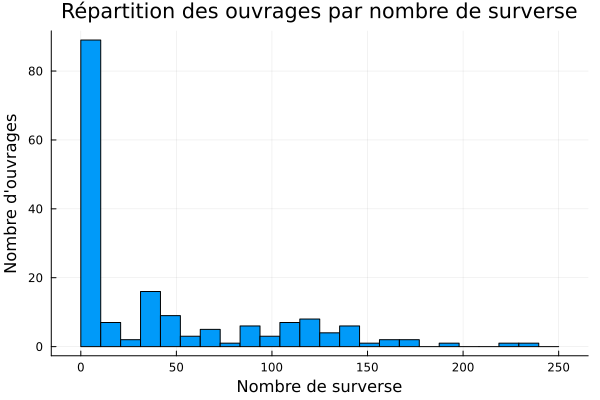

In [8]:

per_site_cso_numbers = DataFrame()

for this_site in groupby(cso_daily_all, :Site)
    
    cso_number = sum(this_site.CSO .== 1)
    size_site = size(this_site)[1]
    start_year = first(Dates.year.(this_site.Date))
    end_year = last(Dates.year.(this_site.Date))
    
    this = DataFrame(Site = this_site.Site[1], Number_CSO = cso_number, Size_data = size_site, Proportion_minority = cso_number/size_site, Start = start_year, End = end_year)
    
    per_site_cso_numbers = vcat(this, per_site_cso_numbers)
    
end
println(sort!(per_site_cso_numbers, :Site))

CSV.write("débalancement_cso.csv", per_site_cso_numbers)

174×6 DataFrame
 Row │ Site      Number_CSO  Size_data  Proportion_minority  Start  End   
     │ String15  Int64       Int64      Float64              Int64  Int64 
─────┼────────────────────────────────────────────────────────────────────
   1 │ 0642-01D           5       1287          0.003885      2014   2020
   2 │ 0672-01D           0       1288          0.0           2014   2020
   3 │ 0672-02D          38       1276          0.0297806     2014   2020
   4 │ 0672-03D          51       1286          0.0396579     2014   2020
   5 │ 0801-01D           0       1288          0.0           2014   2020
   6 │ 0801-02D           0       1287          0.0           2014   2020
   7 │ 0801-03D           0       1288          0.0           2014   2020
   8 │ 0801-04D           6       1287          0.004662      2014   2020
   9 │ 0801-05D         187       1074          0.174115      2014   2020
  10 │ 0801-06D           0       1288          0.0           2014   2020
  11 │ 0801-07D    

 174 │ 4795-01D          40       1288          0.0310559     2014   2020


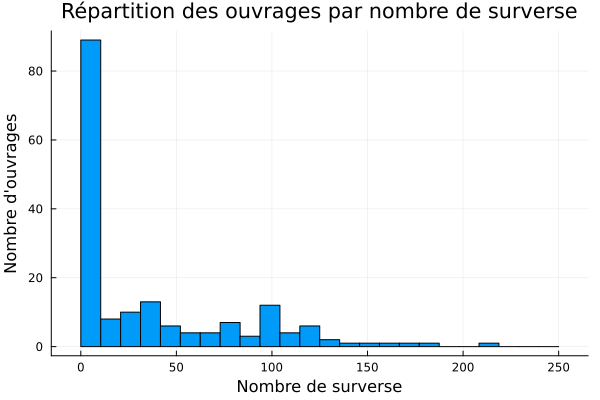

In [47]:
data_aero_daily = innerjoin(rain_aero_daily, cso_daily_all, on = :Date)
deleteCSOAnomalies!(data_aero_daily, "d24h", "CSO", 5.0, true)

per_site_cso_numbers = DataFrame()

for this_site in groupby(data_aero_daily, :Site)
    
    cso_number = sum(this_site.CSO .== 1)
    size_site = size(this_site)[1]
    start_year = first(Dates.year.(this_site.Date))
    end_year = last(Dates.year.(this_site.Date))
    
    this = DataFrame(Site = this_site.Site[1], Number_CSO = cso_number, Size_data = size_site, Proportion_minority = cso_number/size_site, Start = start_year, End = end_year)
    
    per_site_cso_numbers = vcat(this, per_site_cso_numbers)
    
end
println(sort!(per_site_cso_numbers, :Site))